<a href="https://colab.research.google.com/github/benedictlai/thinkful-challenges/blob/master/Final_Project_Draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import sklearn
import scipy
import matplotlib.pyplot as plt
import warnings
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score 
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore")

In [0]:
#Introducing Data

In [3]:
telco = pd.read_csv('https://raw.githubusercontent.com/benedictlai/thinkful-challenges/master/telco.csv')
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup,Contract1
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,No,5-9,50-59.99,500-999.99,0
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45,No,5-9,60-69.99,500-999.99,0
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35,No,5-9,40-49.99,100-499.99,0
3,0018-NYROU,Female,0,Yes,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,68.95,351.5,No,5-9,60-69.99,100-499.99,0
4,0096-BXERS,Female,0,Yes,No,6,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,50.35,314.55,No,5-9,50-59.99,100-499.99,0
5,0122-OAHPZ,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,73.85,511.25,Yes,5-9,70-79.99,500-999.99,0
6,0187-QSXOE,Male,1,Yes,No,7,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.00,605.45,No,5-9,80-89.99,500-999.99,0
7,0196-JTUQI,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.20,633.85,No,5-9,70-79.99,500-999.99,0
8,0196-VULGZ,Female,1,Yes,No,6,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.35,474.9,Yes,5-9,80-89.99,100-499.99,0
9,0224-HJAPT,Male,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,47.15,223.15,Yes,5-9,40-49.99,100-499.99,0


Q1: Gender? - Categorical

Classes: Male or Female

Q2: SeniorCitizen? - Numerical 

Classes: 0 (no) or 1(Yes)

Q3: Partner - Categorical

Classes: Yes or No 

Q4: Dependents - Categorical

Classes: Yes or No 

Q5: tenure - Numerical

Classes: 1- 72

Q6: PhoneService - Categorical

Classes: Yes or No 

Q7: MultipleLines - Categorical

Classes: Yes, No, or No Phone Service

Q8: InternetService - Categorical

Classes: DSL, Fiber Optic, or No

Q9. OnlineSecurity - Categorical

Classes: Yes, No, or No Internet Service

Q10. OnlineBackup - Categorical

Classes: Yes, No, or No Internet Service

Q11. DeviceProtection - Categorical

Classes: Yes, No, or No Internet Service

Q12. TechSupport - Categorical 

Classes: Yes, No, or No Internet Service

Q13. StreamingTV - Categorical 

Classes: Yes, No, or No Internet Service

Q14. StreamingMovies - Categorical

Classes: Yes, No, or No Internet Service

Q15. Contract - Categorical

Classes: Month-to-Month, One Year, Two Year 

Q16. PaperlessBilling	- Categorical 

Classes: Yes or No  

Q17. PaymentMethod - Categorical

Classes: Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check

Q18. MonthlyCharges - Continuous

Classes: 18.25-118.75

Q19: TotalCharges - Continuous

Classes: 18.8-8684.8 

Q20. Churn - Categorical

Classes: Yes or No

Q21. TenureGroup - Categorical

Classes: 0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74

Q22. MCGroup - Categorical

Q23. TCGroup - Categorical

I got this data from Kaggle, which is from https://www.kaggle.com/blastchar/telco-customer-churn.



In [4]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
TenureGroup          object
MCGroup              object
TCGroup              object
Contract1             int64
dtype: object

In [5]:
telco.isnull().sum().sort_values(ascending=False)

TCGroup             11
Contract1            0
DeviceProtection     0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TenureGroup          0
MCGroup              0
customerID           0
dtype: int64

In [0]:
telco['Contract'].fillna("Uncertain",inplace = True)

# Data Analysis

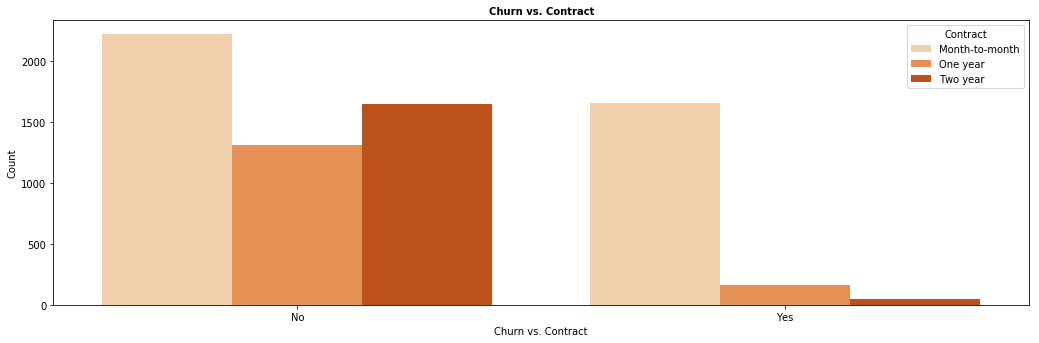

In [7]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="Contract", palette="Oranges",data=telco)
plt.title("Churn vs. Contract",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Contract")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

More customers are more likely to not recommend the company with month-to-month contract.

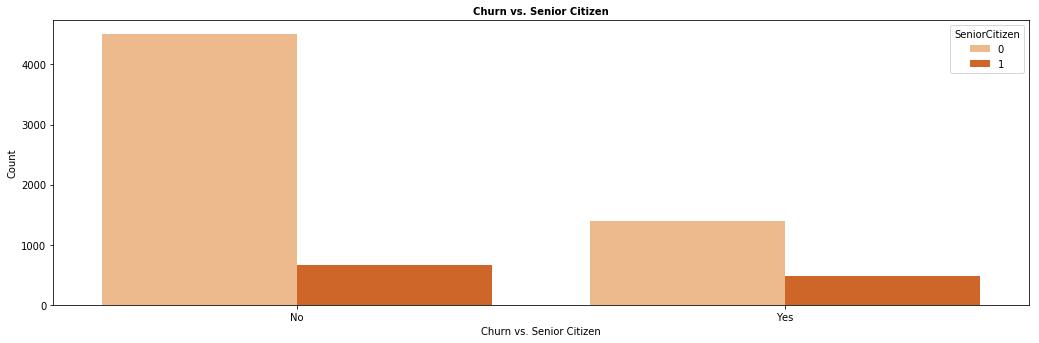

In [8]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="SeniorCitizen", palette="Oranges",data=telco)
plt.title("Churn vs. Senior Citizen",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Senior Citizen")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Senior citizens are less likely to churn because there is an implication they recieve a discount on services. Another implication may not be the discount, but their loyalty to the company (which causes them to have more incentives for them being with the company long).

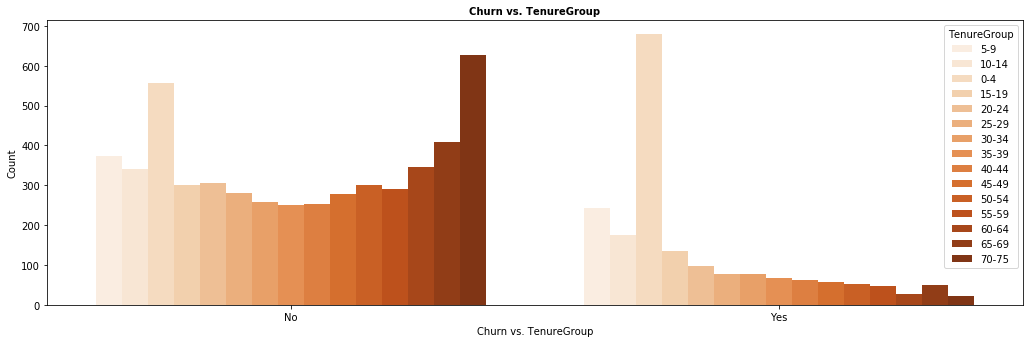

In [9]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="TenureGroup", palette="Oranges",data=telco)
plt.title("Churn vs. TenureGroup",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. TenureGroup")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

Customers who have been with the company longer are less likely to churn because there is an implication they recieve a special discount for staying with the company for a while.

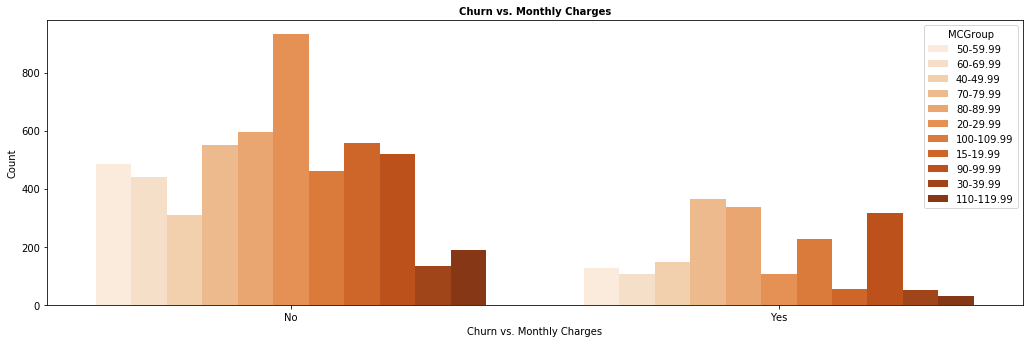

In [10]:
plt.figure(figsize=(10,5))
sns.countplot("Churn", hue="MCGroup", palette="Oranges",data=telco)
plt.title("Churn vs. Monthly Charges",fontsize=10,fontweight="bold")
plt.xlabel("Churn vs. Monthly Charges")
plt.ylabel("Count")
plt.subplots_adjust(top=1.88, bottom=1.09, right=1.48)
plt.show()

In [0]:
gender= LabelEncoder()	
SeniorCitizen= LabelEncoder()	
Partner= LabelEncoder()	
Dependents= LabelEncoder()	
tenure= LabelEncoder()
PhoneService= LabelEncoder()	
MultipleLines= LabelEncoder()	
InternetService= LabelEncoder()	
OnlineSecurity= LabelEncoder()	
OnlineBackup= LabelEncoder()	
DeviceProtection= LabelEncoder()	
TechSupport= LabelEncoder()
StreamingTV= LabelEncoder()	
StreamingMovies= LabelEncoder()	
Contract= LabelEncoder()	
PaperlessBilling= LabelEncoder()	
PaymentMethod= LabelEncoder()	
MonthlyCharges= LabelEncoder()	
TotalCharges= LabelEncoder()	
Churn= LabelEncoder()
TenureGroup= LabelEncoder()
MCGroup= LabelEncoder()
TCGroup= LabelEncoder()


telco['gender']=gender.fit_transform(telco['gender'])
telco['SeniorCitizen']=SeniorCitizen.fit_transform(telco['SeniorCitizen'])
telco['Partner']=Partner.fit_transform(telco['Partner'])
telco['Dependents']=Dependents.fit_transform(telco['Dependents'])
telco['tenure']=tenure.fit_transform(telco['tenure'])
telco['PhoneService']=PhoneService.fit_transform(telco['PhoneService'])
telco['MultipleLines']=MultipleLines.fit_transform(telco['MultipleLines'])
telco['InternetService']=InternetService.fit_transform(telco['InternetService'])
telco['OnlineSecurity']=OnlineSecurity.fit_transform(telco['OnlineSecurity'])
telco['OnlineBackup']=OnlineBackup.fit_transform(telco['OnlineBackup'])
telco['DeviceProtection']=DeviceProtection.fit_transform(telco['DeviceProtection'])
telco['TechSupport']=TechSupport.fit_transform(telco['TechSupport'])
telco['StreamingTV']=StreamingTV.fit_transform(telco['StreamingTV'])
telco['StreamingMovies']=StreamingMovies.fit_transform(telco['StreamingMovies'])
telco['Contract']=Contract.fit_transform(telco['Contract'])
telco['PaperlessBilling']=PaperlessBilling.fit_transform(telco['PaperlessBilling'])
telco['PaymentMethod']=PaymentMethod.fit_transform(telco['PaymentMethod'])
telco['MonthlyCharges']=MonthlyCharges.fit_transform(telco['MonthlyCharges'])
telco['TotalCharges']=TotalCharges.fit_transform(telco['TotalCharges'])
telco['Churn']=Churn.fit_transform(telco['Churn'])
telco['TenureGroup']=Churn.fit_transform(telco['TenureGroup'])
telco['MCGroup']=Churn.fit_transform(telco['MCGroup'])
telco['TCGroup']=Churn.fit_transform(telco['Contract'])

In [12]:
telco.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,MCGroup,TCGroup,Contract1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370,6.364049,5.558427,0.690473,0.690473
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561,4.880838,3.268725,0.833755,0.833755
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000,6.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000,11.000000,9.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000,14.000000,10.000000,2.000000,2.000000


Text(0.5, 1.0, 'Telco Correlations')

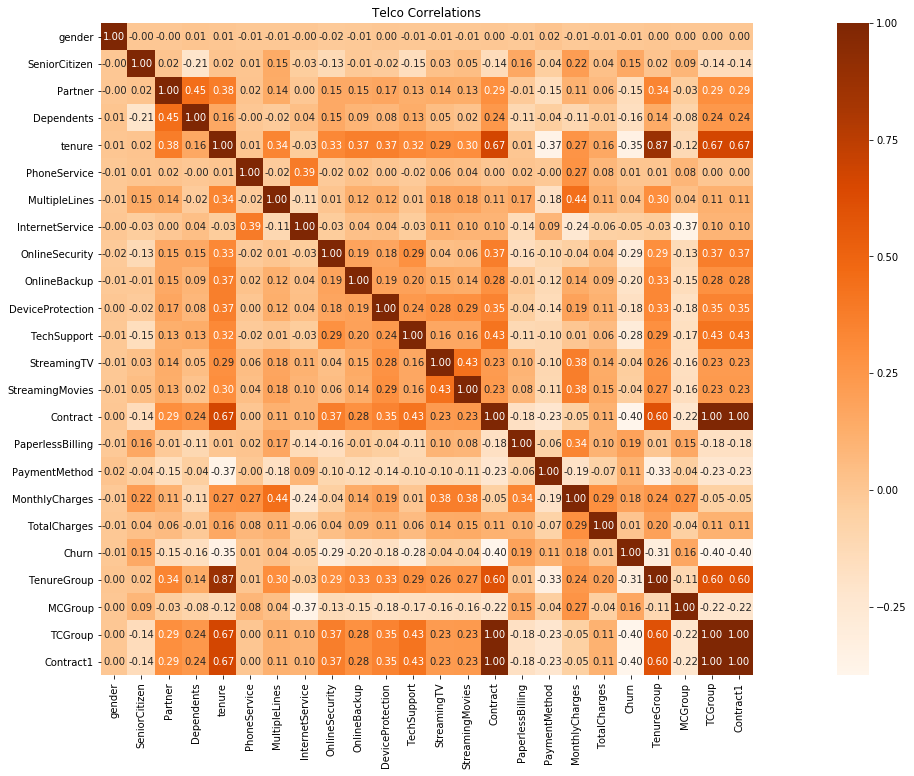

In [13]:

plt.figure(figsize=(30,12))
sns.heatmap(telco.corr(),cmap = 'Oranges',annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.title('Telco Correlations')

In [0]:
X= telco[['Contract', 'SeniorCitizen', 'TenureGroup', 'MCGroup']]
y= telco['Churn']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [16]:
import timeit

%timeit pass

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

print("\n")
print("The Logistic Regression results are below:")
print("Accuracy:",lr_acc_score*100)
print("F1:",f1_score(y_test, lr_predict, average="macro")*100)
print("Precision:",precision_score(y_test,lr_predict, average="macro")*100)
print("Recall:",recall_score(y_test, lr_predict, average="macro")*100) 
print("Cross Validation:", cross_val_score(lr, X_train, y_train, cv=3)*100)
print("\n")

print("Here is the confusion matrix below:\n",lr_conf_matrix)

100000000 loops, best of 3: 7.51 ns per loop


The Logistic Regression results are below:
Accuracy: 76.24230951254141
F1: 60.998820470282325
Precision: 69.99301774448129
Recall: 60.13109520681349
Cross Validation: [75.3649635  76.50639075 75.7151552 ]


Here is the confusion matrix below:
 [[1466   89]
 [ 413  145]]


In [17]:
%timeit pass

gbc = ensemble.GradientBoostingClassifier(random_state = 42)
gbc.fit(X_train, y_train)
pred_gbc = gbc.predict(X_test)

print("\n")
print("The Gradient Boosting Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_gbc )*100)
print("F1:",f1_score(y_test, pred_gbc, average="macro")*100)
print("Precision",precision_score(y_test,pred_gbc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_gbc, average="macro")*100) 
print("Cross Validation:", cross_val_score(gbc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_gbc))

100000000 loops, best of 3: 7.51 ns per loop


The Gradient Boosting Classifier results are below:
Accuracy: 80.02839564600094
F1: 72.84094785575049
Precision 74.4838022497597
Recall: 71.72331132086344
Cross Validation: [80.1703163  78.57577602 78.27145466]


Here is the confusion matrix below:
 [[1389  166]
 [ 256  302]]


In [18]:
%timeit pass

rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print('\n')
print("The Random Forest Classifier results are below:")
print("Accuracy:",accuracy_score(y_test,pred_rfc )*100)
print("F1:",f1_score(y_test,pred_rfc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_rfc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_rfc, average="macro")*100) 
print("Cross Validation:", cross_val_score(rfc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_rfc))

100000000 loops, best of 3: 7.53 ns per loop


The Random Forest Classifier results are below:
Accuracy: 78.60861334595361
F1: 71.92445899357047
Precision: 72.41093346912697
Recall: 71.50554921688621
Cross Validation: [77.43309002 77.17589775 77.23676202]


Here is the confusion matrix below:
 [[1346  209]
 [ 243  315]]


In [19]:

%timeit pass

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print('\n')
print("The Support Vector Machine (Classifier) results are below:")
print("Accuracy:",accuracy_score(y_test,pred_svc )*100)
print("F1:",f1_score(y_test, pred_svc, average="macro")*100)
print("Precision:",precision_score(y_test,pred_svc, average="macro")*100)
print("Recall:",recall_score(y_test, pred_svc, average="macro")*100) 
print("Cross Validation:", cross_val_score(svc, X_train, y_train, cv=3)*100)
print("\n")
print("Here is the confusion matrix below:\n", confusion_matrix(y_test,pred_svc))

100000000 loops, best of 3: 7.52 ns per loop


The Support Vector Machine (Classifier) results are below:
Accuracy: 79.41315664931378
F1: 71.24849033108083
Precision: 73.79491055263027
Recall: 69.81156864778896
Cross Validation: [79.5620438  78.27145466 78.02799757]


Here is the confusion matrix below:
 [[1402  153]
 [ 282  276]]


*Describe your model in detail: why you chose it, why it works, what problem it solves, how it will run in a production like environment. What would you need to do to maintain it going forward?*

I chose Logistic Regression because it was straightforward to use and easy to train. I chose Gradient Boosting because of the decision trees that can predict which age group has the most popularity with each of the questions. Also, it handles null values, which may be the most useful model for my dataset. I chose Random Forest because it is faster to produce results. Also, my data is not all balanced so this feature is efficient to use. I chose Support Vector Classifier due to its flexibility for datasets.

Gradient Boosting, Random Forest, Support Vector Classifier, and Logistic Regression were the models I chose for this based on the lessons I read. I checked on all those 4 models to determine which model would fit accurately with my model.

Random Forest Classifier had the lowest accuracy score of 75.01% and the lowest overall for cross-validation scores. Logistic Regression had the second lowest accuracy score of 76.15%. Gradient Boosting had the second highest accuracy score of 76.62%. Support Vector Machine had the highest accuracy score with 76.90%.

The cross-validation scores were consistent with the the four models that I used in terms of ranking. 

The models work because of the higher than expected scores in these models. The problem that it helped determine if tenure customers are more likely to churn based on customer behavior such as the preferences for contracts, how long they have been a customer with Telco, and if they are a senior citizen. These factors may impact on customer retention. The results of my research will not only benefit Telco Company but it will also benefit other companies so it can inspire other customers to give true feedback to the company especially with the preferences of contracts.

What I would need to do to maintain it going forward is to test out more variables to make the accuracy scores even better (not to 100% because something would be wrong with the model if that were happen)

In [0]:

from scipy.stats import f_oneway, kruskal, shapiro, ttest_ind, ttest_rel, wilcoxon

In [0]:
raw = telco.dropna()

In [22]:
raw.shape

(7043, 25)

					Distribution of TenureGroup


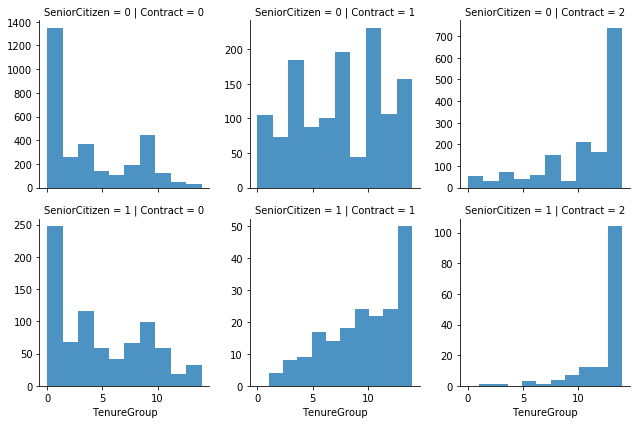

Shapiro Tests
0 0 (0.8422066569328308, 0.0)
0 1 (0.9077737331390381, 1.1069899038010571e-21)

1 0 (0.9512615203857422, 3.2342975208325056e-20)
1 1 (0.9154883027076721, 5.530008895249239e-09)

2 0 (0.8157766461372375, 7.168595929275645e-39)
2 1 (0.6443732380867004, 3.160657782309609e-17)



In [23]:
g = sns.FacetGrid(raw, row='SeniorCitizen', col='Contract', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'TenureGroup', alpha=0.8)
print('\t\t\t\t\tDistribution of TenureGroup')
plt.show()

Contracts = list(raw.Contract.unique())
SeniorCitizens = [0,1]
print('Shapiro Tests')
for cnt in Contracts:
    temp = raw[raw.Contract ==cnt].dropna()
    for SeniorCitizen in SeniorCitizens:
        print(cnt, SeniorCitizen, shapiro(temp[temp.SeniorCitizen ==SeniorCitizen].TenureGroup))
    print()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f651a632240>,
      dtype=object)

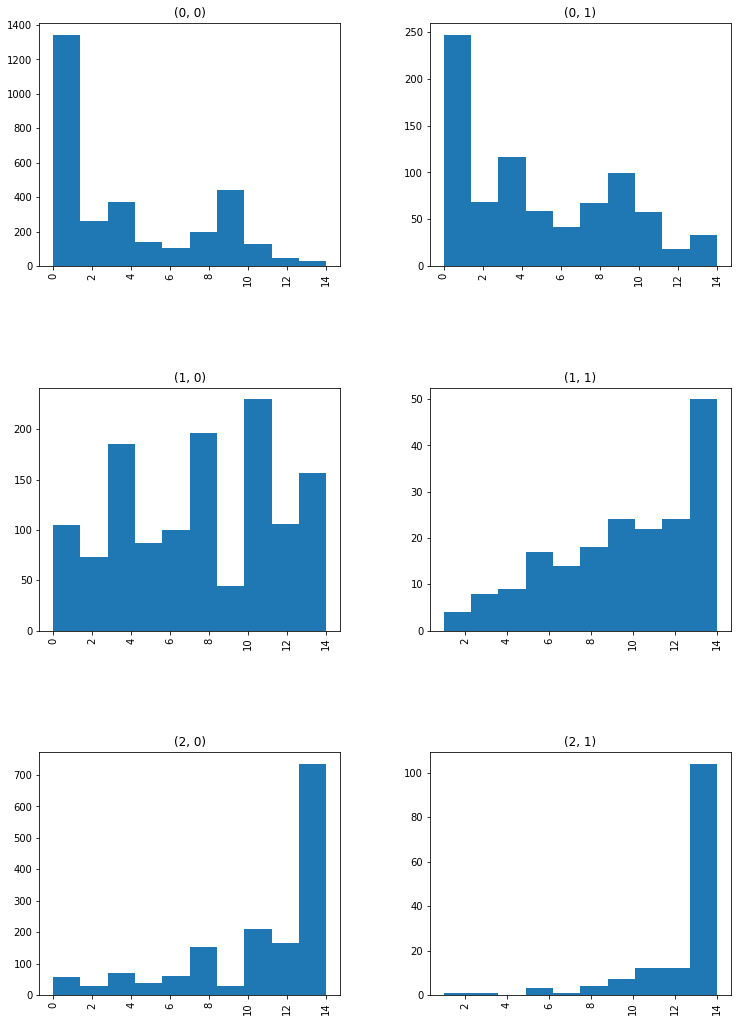

In [24]:
plt.rcParams['figure.figsize'] = [12,18]

telco.hist(by=['Contract', 'SeniorCitizen'], column='TenureGroup')

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
telco2 = telco.dropna()

tukey = pairwise_tukeyhsd(endog=telco2['TenureGroup'],      
                          groups=telco2['Contract'],   
                          alpha=0.05)         

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.8513,0.001,3.5721,4.1305,True
0,2,6.9951,0.001,6.7295,7.2608,True
1,2,3.1438,0.001,2.8189,3.4687,True
